# Hotel Booking

## Load and Analyze Data

In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\anoos\\Downloads\\hotel_booking.csv'
hotel_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(hotel_data.head())

# Display basic information about the dataset
print(hotel_data.info())

# Display descriptive statistics
print(hotel_data.describe())

# Check for missing values
print(hotel_data.isnull().sum())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

## Handle Missing Values

In [3]:
# Handle missing values
# For simplicity, we'll fill missing numerical values with the median and categorical values with the mode
hotel_data['children'].fillna(hotel_data['children'].median(), inplace=True)
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)
hotel_data['agent'].fillna(hotel_data['agent'].mode()[0], inplace=True)
hotel_data['company'].fillna(hotel_data['company'].mode()[0], inplace=True)

# Verify missing values are handled
print(hotel_data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

##  Univariate Analysis

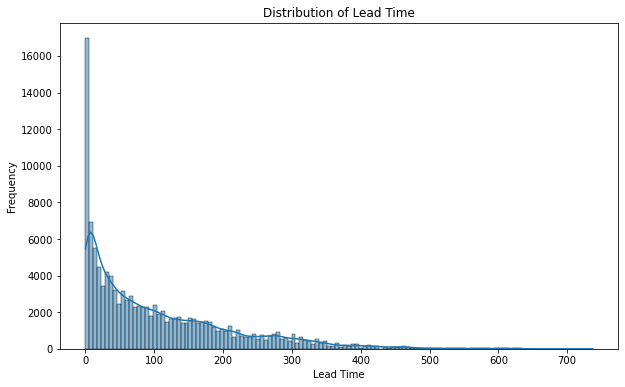

In [4]:
# LEAD TIME 
import matplotlib.pyplot as plt
import seaborn as sns

# Lead Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['lead_time'], kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

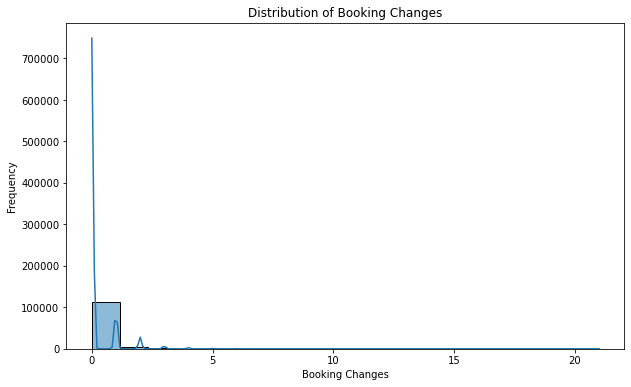

In [5]:
# Booking Changes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['booking_changes'], kde=True)
plt.title('Distribution of Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

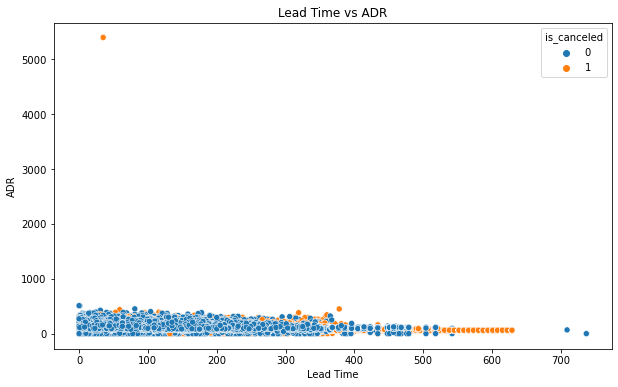

In [8]:
# Scatter plot of Lead Time vs ADR
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hotel_data, x='lead_time', y='adr', hue='is_canceled')
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()

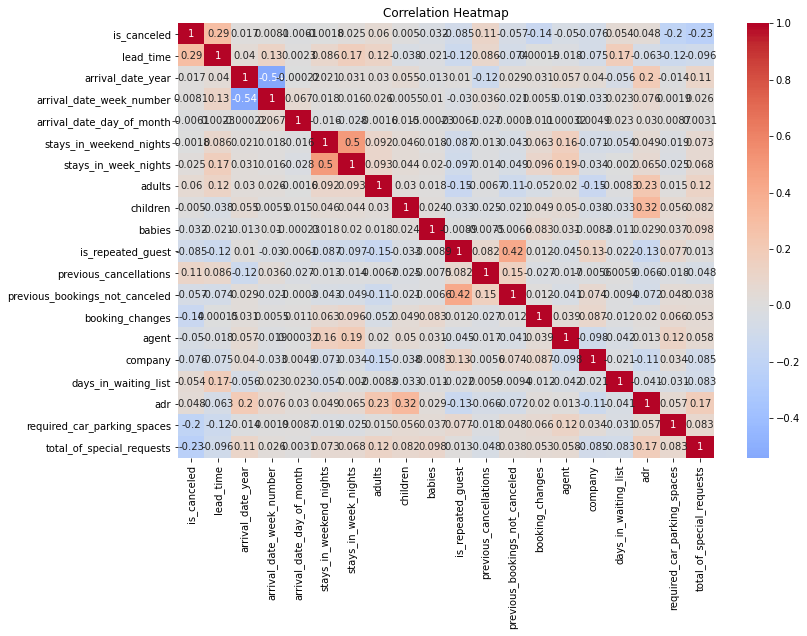

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hotel_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Outlier Analysis

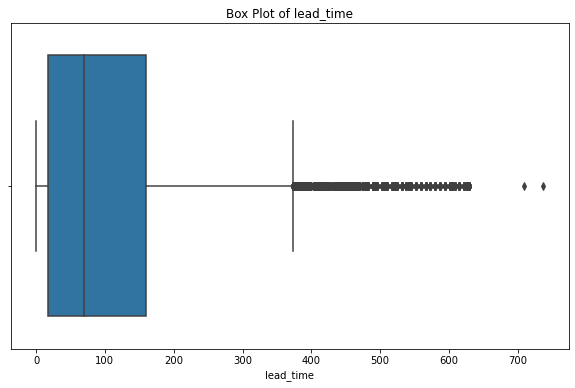

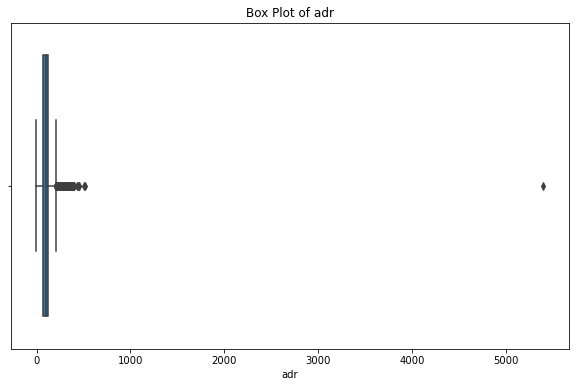

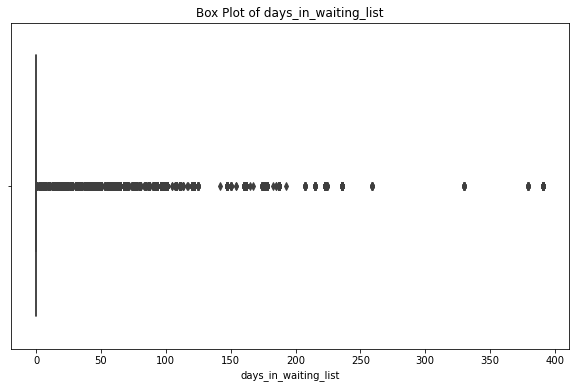

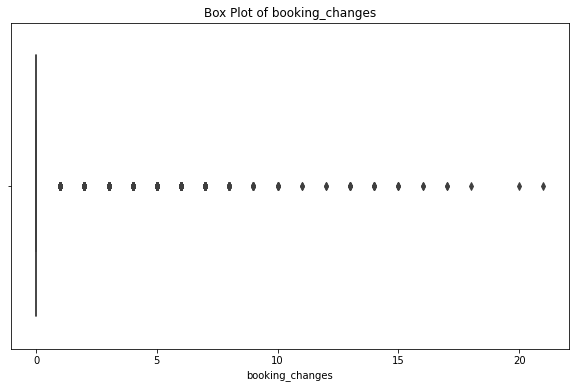

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=hotel_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

## Statistical Tests

In [11]:
#SHAPIRO-WILK TEST
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on lead_time
stat, p = shapiro(hotel_data['lead_time'])
print(f'Shapiro-Wilk Test for Lead Time: Statistics={stat}, p-value={p}')

Shapiro-Wilk Test for Lead Time: Statistics=0.8567901849746704, p-value=0.0


C:\Users\anoos\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
#ANOVA Test
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Perform ANOVA for ADR by Hotel Type
anova_model = ols('adr ~ C(hotel)', data=hotel_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table for ADR by Hotel Type:")
print(anova_table)

ANOVA Table for ADR by Hotel Type:
                sum_sq        df            F         PR(>F)
C(hotel)  2.852266e+06       1.0  1127.379303  5.234634e-246
Residual  3.020513e+08  119388.0          NaN            NaN


In [13]:
# Tukey's Test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's test for ADR by Hotel Type
tukey = pairwise_tukeyhsd(hotel_data['adr'], hotel_data['hotel'])
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj  lower    upper  reject
--------------------------------------------------------------
City Hotel Resort Hotel -10.3515 0.001 -10.9558 -9.7473   True
--------------------------------------------------------------


In [14]:
# Chi-Squared Test

from scipy.stats import chi2_contingency

# Perform Chi-Squared test for hotel and is_canceled
contingency_table = pd.crosstab(hotel_data['hotel'], hotel_data['is_canceled'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Squared Test for hotel and is_canceled: Chi2={chi2}, p-value={p}')

Chi-Squared Test for hotel and is_canceled: Chi2=2224.924903923313, p-value=0.0


In [15]:
# T-Test
from scipy.stats import ttest_ind

# Perform t-test for ADR by Hotel Type
city_hotel_adr = hotel_data[hotel_data['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = hotel_data[hotel_data['hotel'] == 'Resort Hotel']['adr']
stat, p = ttest_ind(city_hotel_adr, resort_hotel_adr)
print(f'T-test for ADR by Hotel Type: Statistics={stat}, p-value={p}')

T-test for ADR by Hotel Type: Statistics=33.57646947661598, p-value=5.234634148763048e-246


## Seasonality Analysis
Analyzing seasonality effects on bookings and cancellations.

In [16]:
# Convert arrival_date_month to categorical type ordered by month
hotel_data['arrival_date_month'] = pd.Categorical(hotel_data['arrival_date_month'],
                                                  categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                              'July', 'August', 'September', 'October', 'November',
                                                              'December'],
                                                  ordered=True)


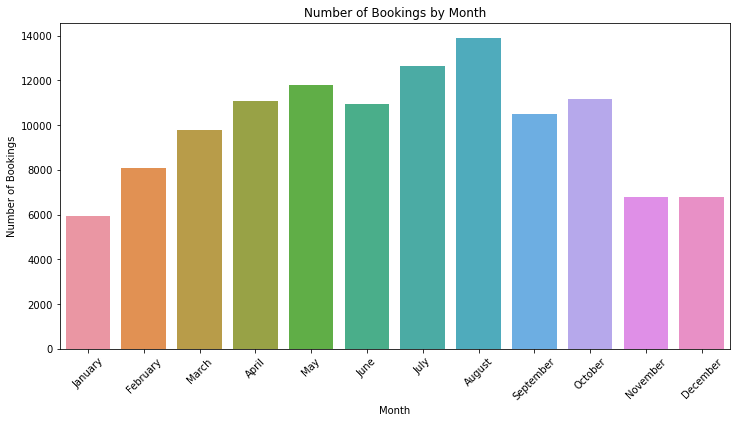

In [17]:
# Plot bookings by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=hotel_data, order=hotel_data['arrival_date_month'].cat.categories)
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

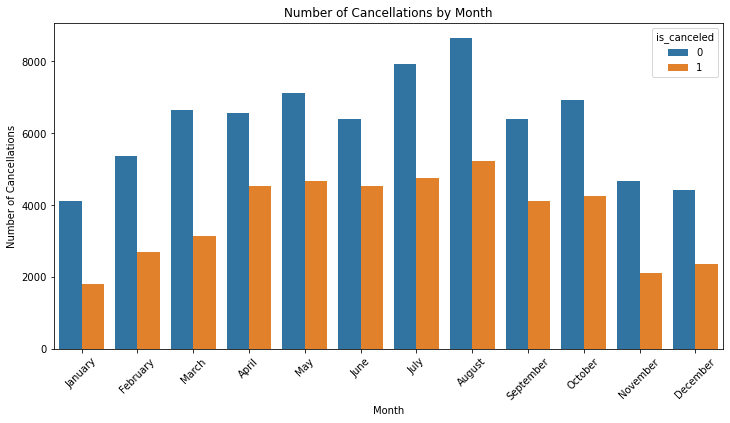

In [29]:
# Plot cancellations by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel_data, order=hotel_data['arrival_date_month'].cat.categories)
plt.title('Number of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

## Descriptive Analytics using Visualizations

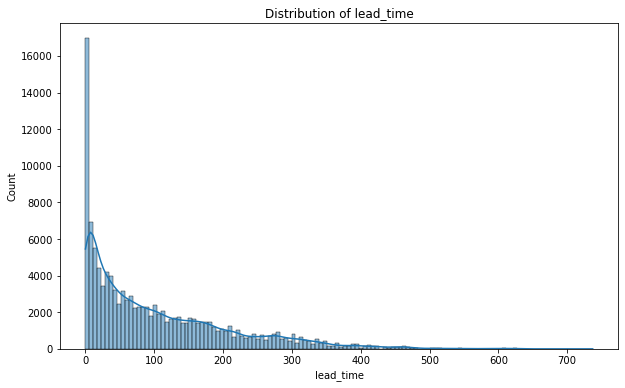

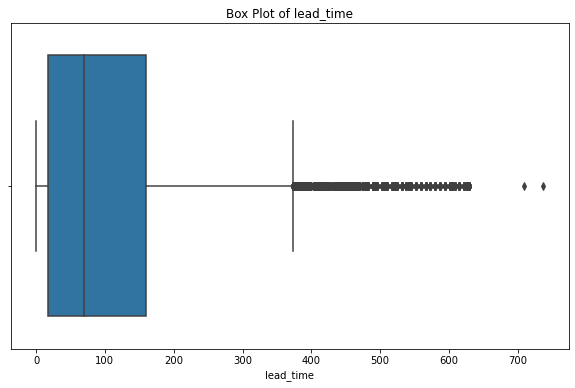

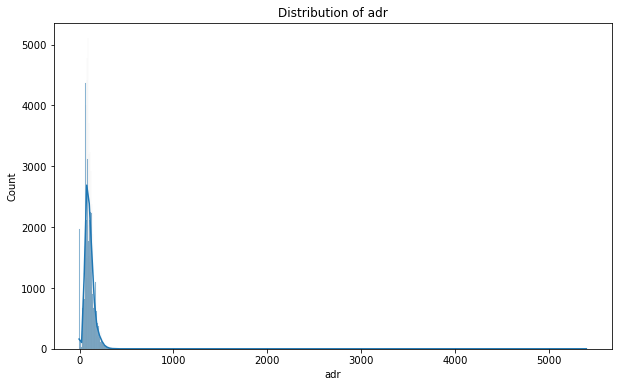

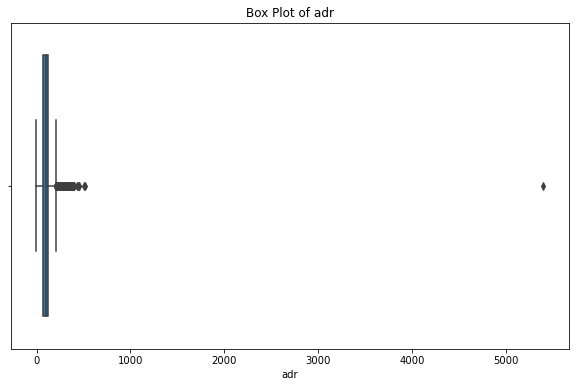

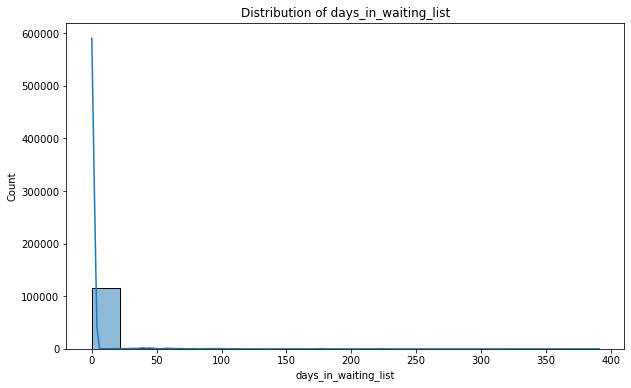

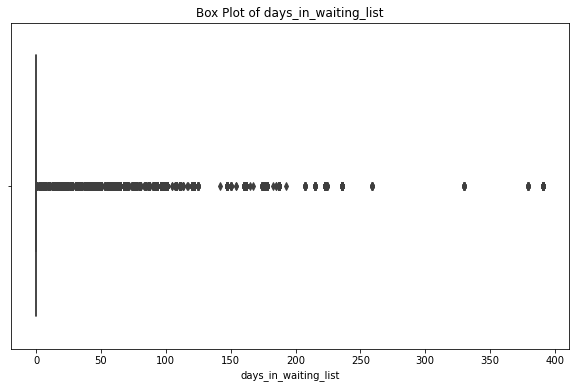

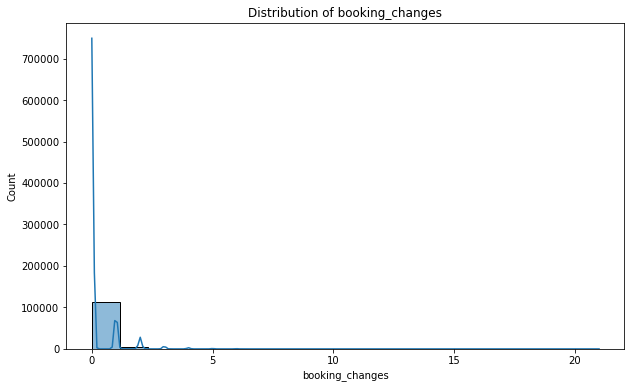

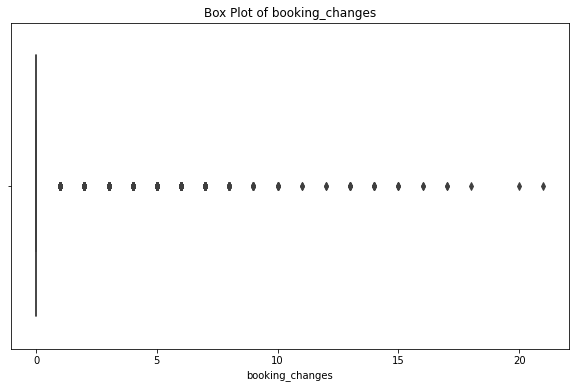

In [22]:
# Descriptive analytics using histograms and box plots for key numerical variables
numerical_columns = ['lead_time', 'adr', 'days_in_waiting_list', 'booking_changes']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(hotel_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=hotel_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

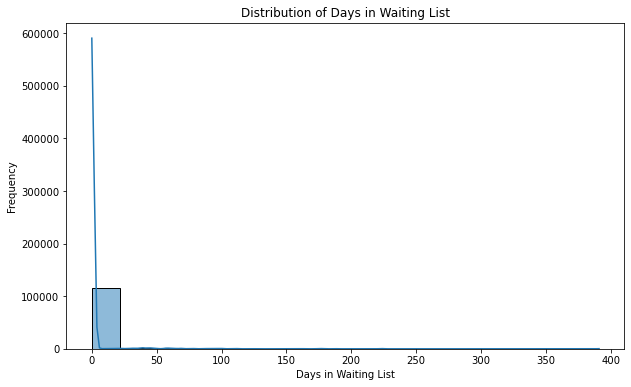

In [23]:
# Days in Waiting List Distribution
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['days_in_waiting_list'], kde=True)
plt.title('Distribution of Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.show()


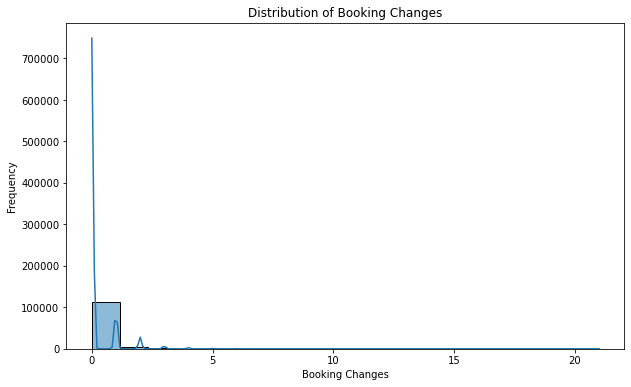

In [24]:
# Booking Changes Distribution
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['booking_changes'], kde=True)
plt.title('Distribution of Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Frequency')
plt.show()

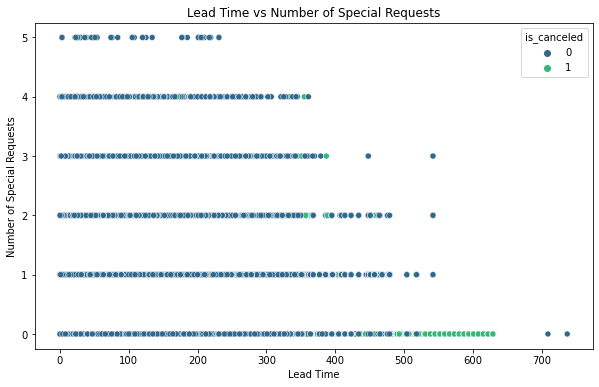

In [25]:
# Scatter plot of Lead Time vs Number of Special Requests
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hotel_data, x='lead_time', y='total_of_special_requests', hue='is_canceled', palette='viridis')
plt.title('Lead Time vs Number of Special Requests')
plt.xlabel('Lead Time')
plt.ylabel('Number of Special Requests')
plt.show()

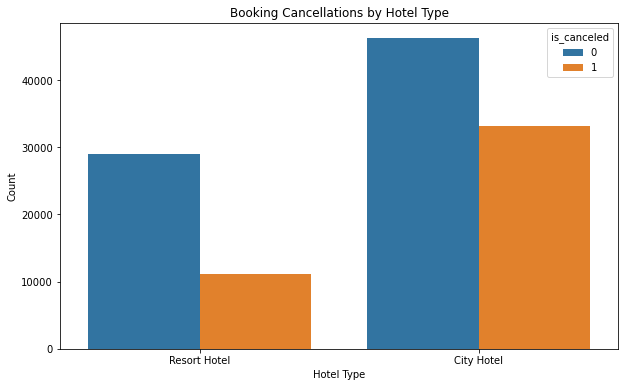

In [26]:
# Count plot of Cancellations by Hotel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', hue='is_canceled', data=hotel_data)
plt.title('Booking Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

## Insights and Analysis from Hotel Booking EDA

### 1. Initial Inspection and Descriptive Statistics
- **Dataset Overview**: The dataset includes a variety of features related to hotel bookings, such as lead time, average daily rate (ADR), booking changes, and more.
- **Missing Values**: Key missing values were found in columns such as "children", "country", "agent" , and "company". These were handled by filling with the median or mode as appropriate.

### 2. Univariate Analysis
- **Lead Time**: 
  - Distribution is right-skewed, indicating that most bookings are made with a short lead time.
  - Median lead time is relatively low, with a few extreme values indicating very early bookings.
- **Booking Changes**:
  - Most bookings have no changes, with a small number of bookings having multiple changes.
  - The distribution suggests that booking changes are uncommon.

### 3. Outlier Analysis
- **Lead Time Outliers**: 
  - A significant number of outliers with extremely high lead times were observed, which might indicate early planners or corporate bookings.
- **ADR (Average Daily Rate) Outliers**:
  - Some extreme values suggest high variability in pricing, potentially due to different room types, seasons, or booking conditions.

### 4. Bivariate Analysis
- **Lead Time vs ADR**:
  - Scatter plot analysis shows no clear linear relationship between lead time and ADR. 
  - Both variables have high variability and outliers, indicating complex pricing and booking behaviors.
- **Correlation Heatmap**:
  - Weak correlations between most numerical variables, except for "adr" and "total_of_special_requests", indicating potential influences on pricing.

### 5. Statistical Tests
- **Shapiro-Wilk Test**:
  - The lead time data is not normally distributed (p-value < 0.05).
- **ANOVA Test**:
  - Significant differences in ADR between different hotel types (p-value < 0.05), suggesting pricing strategies vary by hotel type.
- **Tukey's Test**:
  - Pairwise comparison confirms significant differences in ADR between City Hotel and Resort Hotel.
- **Chi-Squared Test**:
  - Significant relationship between hotel type and cancellation status (p-value < 0.05). City Hotels tend to have higher cancellation rates.
- **T-Test**:
  - Significant difference in ADR between City Hotel and Resort Hotel (p-value < 0.05), with City Hotels generally having higher rates.

### 6. Seasonality Analysis
- **Monthly Bookings**:
  - Higher number of bookings during summer months (June to August), indicating seasonality trends in travel.
- **Monthly Cancellations**:
  - Higher cancellation rates also observed in summer, potentially due to overbooking or changes in travel plans.

### 7. Descriptive Analytics using Visualizations
- **Histograms and Box Plots**:
  - Provide a clear visualization of the distributions and spread of key variables such as lead time, ADR, and booking changes.
  - Highlight the presence of outliers and skewness in the data.

### 8. Outlier Analysis
- **Box Plots**:
  - Reinforce the presence of outliers in lead time and ADR, suggesting that while most bookings are made with short lead times and at standard rates, there are exceptions that might be worth further investigation.
- **Scatter Plot**:
  - Shows the relationship between lead time and ADR, illustrating the high variability and presence of outliers in both variables.

## Conclusion
The EDA of the hotel booking dataset provides several insights into customer booking and cancellation trends. Key influences such as seasonality, lead time, and customer preferences have been identified, helping to understand consumer behavior. These insights can assist hoteliers in optimizing marketing strategies, pricing models, and service offerings to improve occupancy rates and enhance guest experiences. Specific attention to seasonality trends and cancellation patterns can inform targeted marketing and overbooking strategies, while outlier analysis may uncover unique customer segments or booking behaviors.
